In [6]:
import torch
import torchvision
import os
from torch import nn
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms

## 1. Turn single image into Patches


(-0.5, 511.5, 511.5, -0.5)

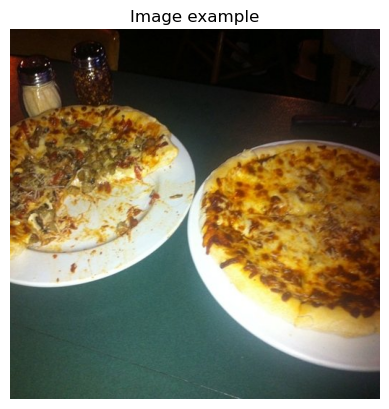

In [16]:
image_path = "../data/pizza_steak_sushi"
train_dir = os.path.join(image_path, "train")
test_dir = os.path.join(image_path, "test")
# read image as PyTorch tensor
image_np = plt.imread(os.path.join(train_dir, "pizza", "1008844.jpg"))
# Convert the NumPy array to a PyTorch tensor
image = torch.tensor(image_np).permute(2, 0, 1)  # Rearrange the dimensions
image = image / 255.0
plt.imshow(image.permute(1, 2, 0))
plt.title("Image example")
plt.axis(False)

In [19]:
# Change image shape to be compatible with matplotlib (color_channels, height, width) -> (height, width, color_channels)
image_permuted = image.permute(1, 2, 0)

# Index to plot the top row of patched pixels
img_size = 224
patch_size = 16
num_patches = img_size / patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(
    f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels"
)

# Create a series of subplots
fig, axs = plt.subplots(
    nrows=1,
    ncols=img_size // patch_size,  # one column for each patch
    figsize=(num_patches, num_patches),
    sharex=True,
    sharey=True,
)

# Iterate through number of patches in the top row
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size / patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(
    f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels"
)

# Create a series of subplots
fig, axs = plt.subplots(
    nrows=img_size // patch_size,  # need int not float
    ncols=img_size // patch_size,
    figsize=(num_patches, num_patches),
    sharex=True,
    sharey=True,
)

# Loop through height and width of image
for i, patch_height in enumerate(
    range(0, img_size, patch_size)
):  # iterate through height
    for j, patch_width in enumerate(
        range(0, img_size, patch_size)
    ):  # iterate through width
        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(
            image_permuted[
                patch_height : patch_height + patch_size,  # iterate through height
                patch_width : patch_width + patch_size,  # iterate through width
                :,
            ]
        )  # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(
            i + 1,
            rotation="horizontal",
            horizontalalignment="right",
            verticalalignment="center",
        )
        axs[i, j].set_xlabel(j + 1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"Patchified", fontsize=16)
plt.show()

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels
Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


In [10]:
# Create example values
height = 224  # H ("The training resolution is 224.")
width = 224  # W
color_channels = 3  # C
patch_size = 16  # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(
    f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}"
)

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


In [4]:
# Input shape (this is the size of a single image)
embedding_layer_input_shape = (height, width, color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(
    f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}"
)

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)
